In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [113]:
df = pd.read_csv('OilPrice.csv', parse_dates = ['Datetime'], index_col = ['Datetime'], )

In [114]:
df.head()

,Oil
Datetime,
2008-06-01,5138
2008-07-01,5177
2008-08-01,5003
2008-09-01,3974
2008-10-01,4738


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2008-06-01 to 2018-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Oil     121 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


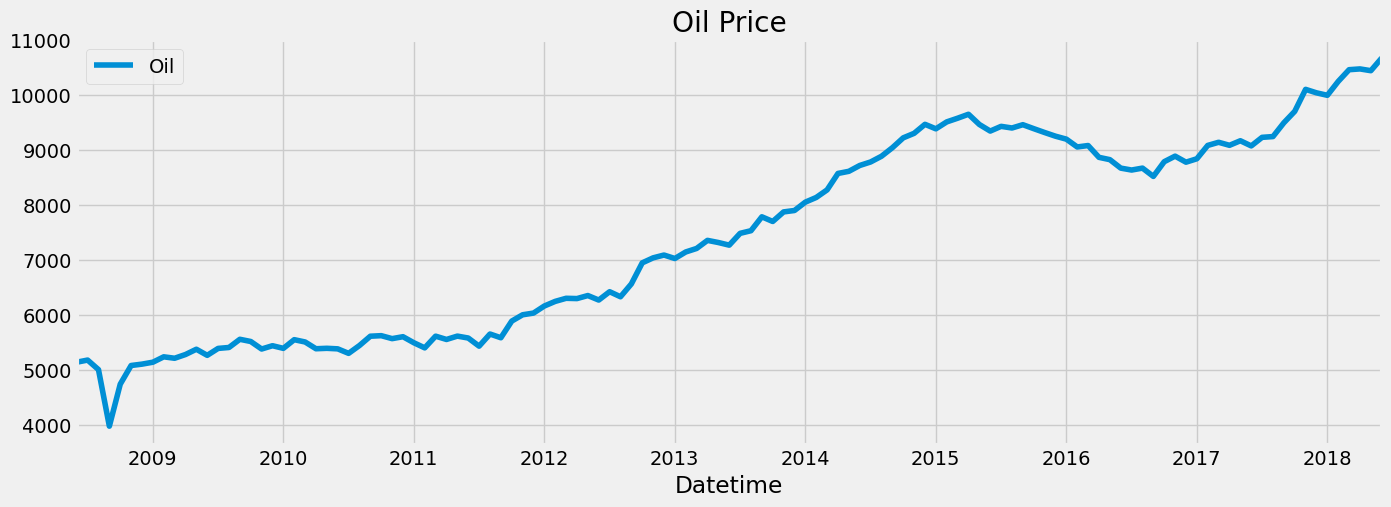

In [116]:
#plot the data
df.plot(figsize = (15, 5), color = color_pal[0], title = "Oil Price")
plt.show()

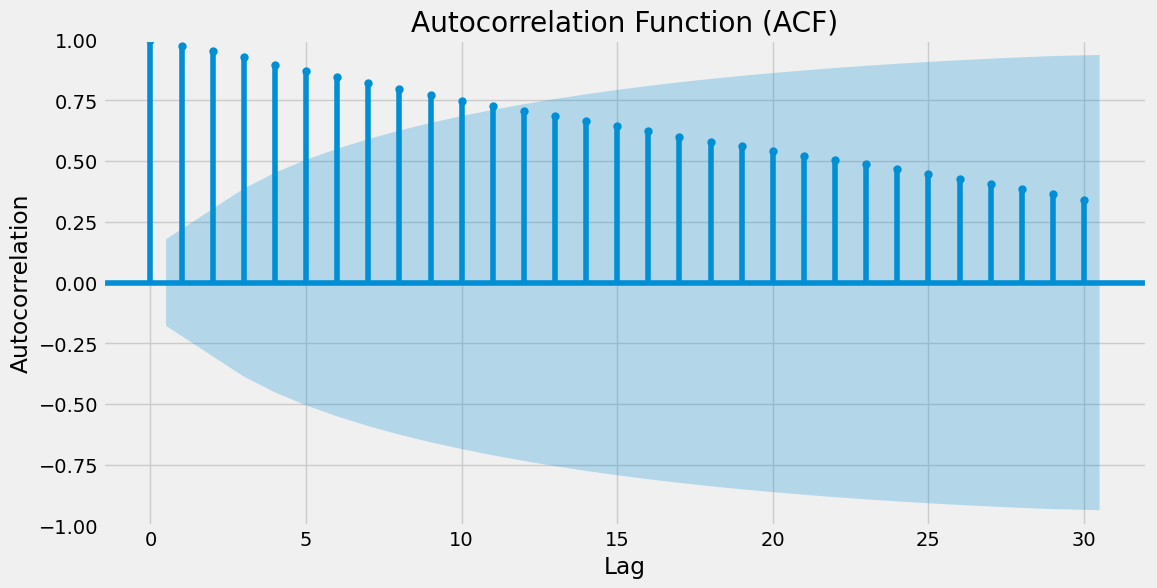

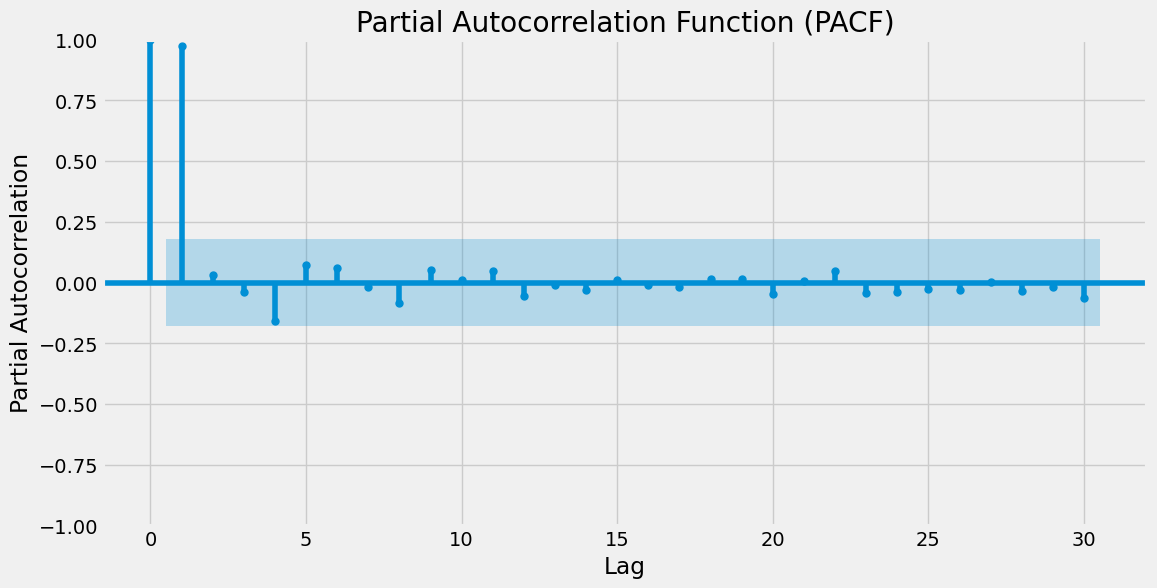

In [117]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(series, lags=None):
    # Plot ACF
    plt.figure(figsize=(12, 6))
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.title('Autocorrelation Function (ACF)')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.show()
    
    # Plot PACF
    plt.figure(figsize=(12, 6))
    plot_pacf(series, lags=lags, ax=plt.gca())
    plt.title('Partial Autocorrelation Function (PACF)')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.show()

# Example usage:
# Assuming df is your DataFrame and 'Oil' is the column you want to model
plot_acf_pacf(df['Oil'], lags=30)  # You can adjust the number of lags as needed

In [118]:
def create_arima_model(df, column_name, p, d, q):
    # Convert the DataFrame column to a pandas Series
    series = df[column_name]
    
    # Split the data into training and testing sets (80-20 split)
    train_size = int(len(series) * 0.8)
    train, test = series[:train_size], series[train_size:]
    
    # Fit ARIMA model
    model = ARIMA(train, order=(p, d, q))
    fitted_model = model.fit()
    
    # Make predictions
    predictions = fitted_model.forecast(steps=len(test))
    
    # Visualize the training, testing, and predictions
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train.values, label='Training Data')
    plt.plot(test.index, test.values, label='Actual Test Data')
    plt.plot(test.index, predictions, color='red', label='Predicted Test Data')
    plt.title('ARIMA Model Predictions vs Actual')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    #Forecasting another 24 months 
    final_model = ARIMA(df, order=(p,d,q)).fit()
    prediction=final_model.predict(len(df),len(df)+24)

    df.plot(legend=True, label='Train', figsize=(10,6))
    prediction.plot(legend=True, label='prediction')
    
    # Calculate and print RMSE
    rmse = np.sqrt(mean_squared_error(test, predictions))
    print("Root Mean Squared Error (RMSE):", rmse)

c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

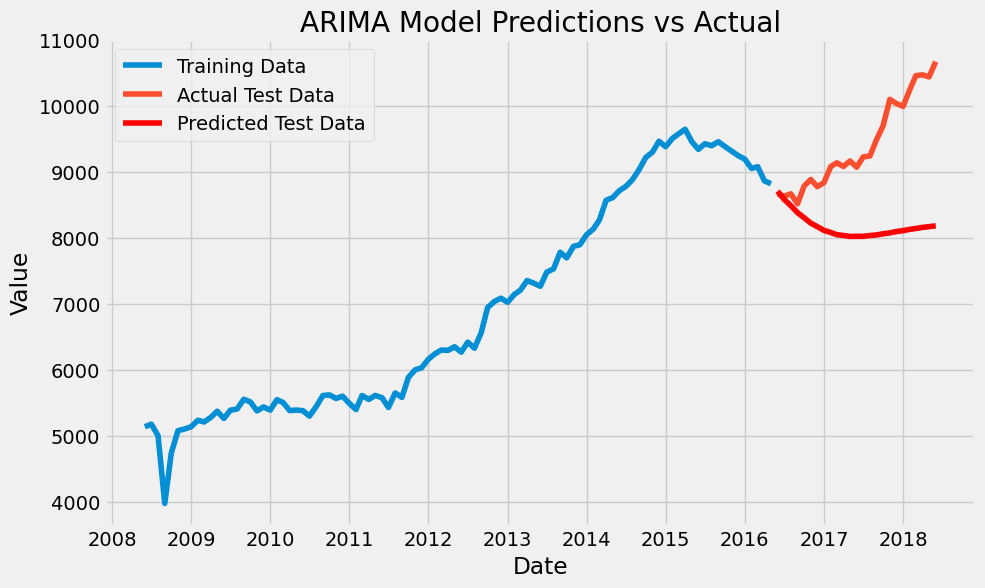

c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

Root Mean Squared Error (RMSE): 1455.623130586796


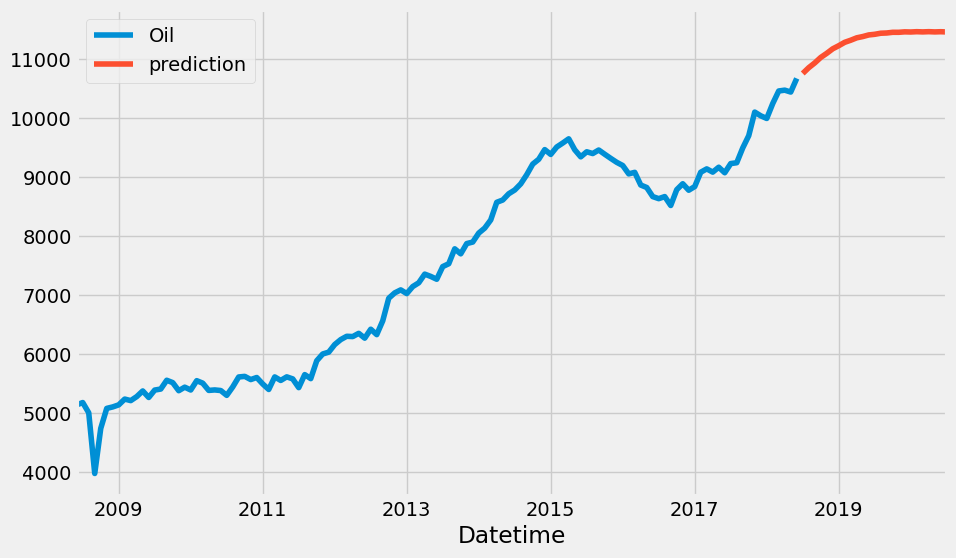

In [132]:
create_arima_model(df, 'Oil', 5,1,4)

## ARIMA model are too complicated, lets use AR model instead

In [138]:
def differentiate_and_plot(series, diff_order):
    # Differentiate the series the specified number of times
    differentiated_series = series.diff(diff_order).dropna()
    
    # Plot the differentiated series
    plt.figure(figsize=(10, 6))
    plt.plot(differentiated_series.index, differentiated_series.values, label=f'{diff_order}th Order Difference')
    plt.title(f'{diff_order}th Order Difference of Time Series')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    # Perform ADF test to check stationarity
    result = adfuller(differentiated_series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] < 0.05:
        print("The differentiated series is likely stationary (reject the null hypothesis)")
    else:
        print("The differentiated series is likely non-stationary (fail to reject the null hypothesis)")


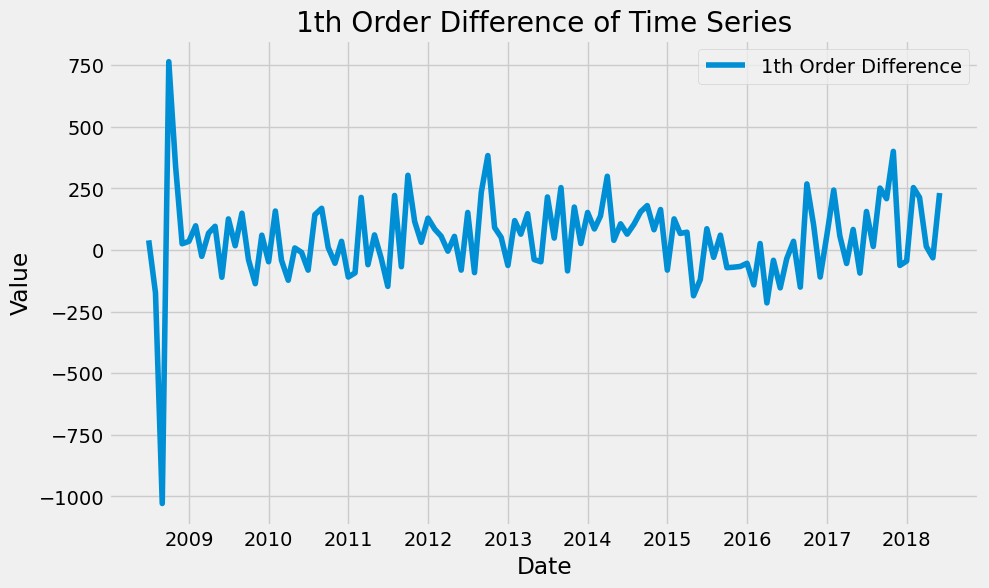

ADF Statistic: -8.50487693452379
p-value: 1.2104550397088313e-13
Critical Values:
   1%: -3.4870216863700767
   5%: -2.8863625166643136
   10%: -2.580009026141913
The differentiated series is likely stationary (reject the null hypothesis)


In [145]:
differentiate_and_plot(df['Oil'], 1)

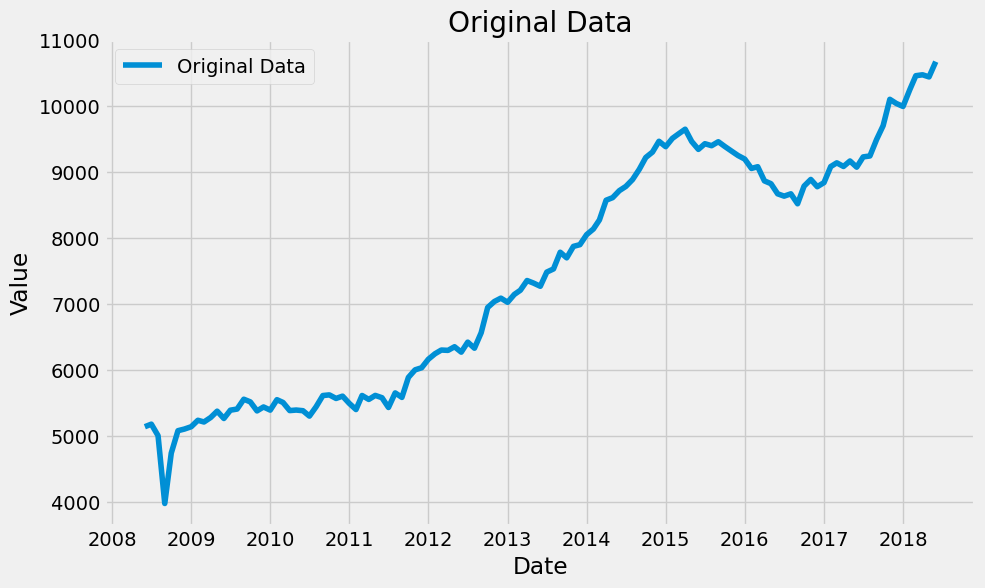

c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


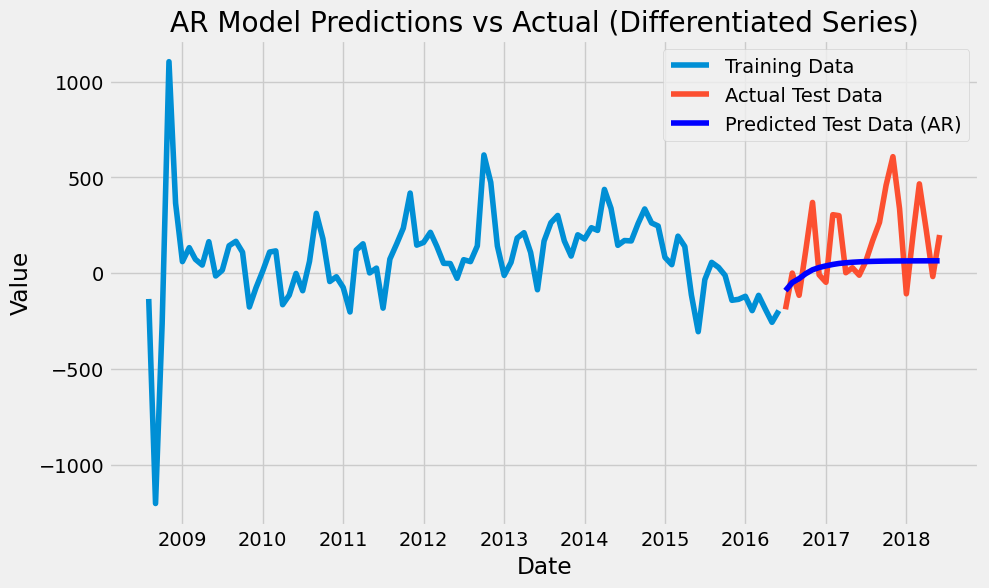

c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


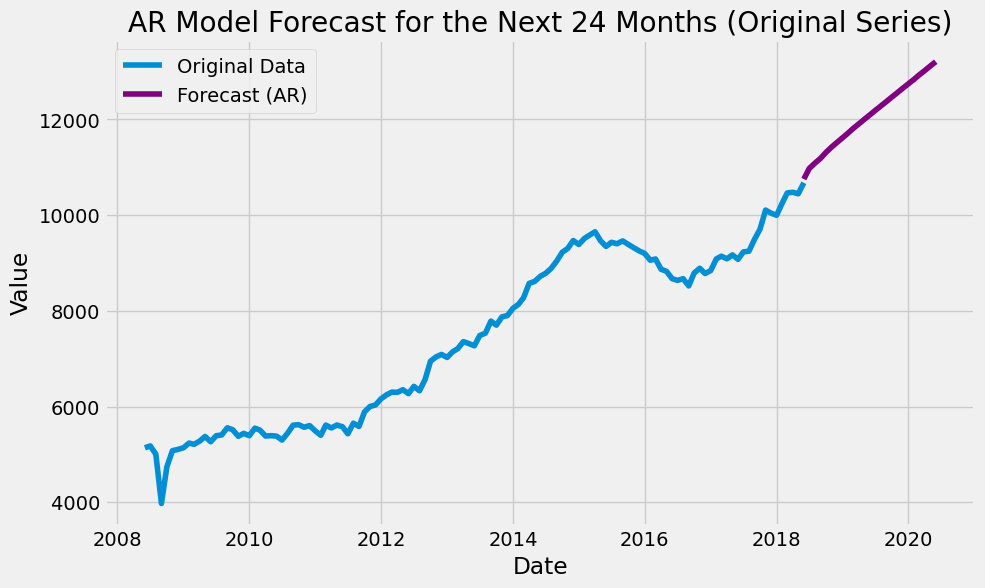

Root Mean Squared Error (RMSE) for differentiated series: 218.86187541288706
ADF Statistic for differentiated series: -4.646585810520934
p-value for differentiated series: 0.00010590293133293507
Critical Values for differentiated series:
   1%: -3.4880216384691867
   5%: -2.8867966864160075
   10%: -2.5802408234244947
The differentiated series is likely stationary (reject the null hypothesis)


In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

def differentiate_series(series, diff_order):
    # Differentiate the series the specified number of times
    differentiated_series = series.diff(diff_order).dropna()
    return differentiated_series

def create_ar_model(df, column_name, p, diff_order=0):
    # Convert the DataFrame column to a pandas Series
    series = df[column_name]
    
    # Plot the original series before differentiation
    plt.figure(figsize=(10, 6))
    plt.plot(series.index, series.values, label='Original Data')
    plt.title('Original Data')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    
    # Differentiate the series if diff_order is specified
    if diff_order > 0:
        differentiated_series = differentiate_series(series, diff_order)
    else:
        differentiated_series = series
    
    # Split the data into training and testing sets (80-20 split)
    train_size = int(len(differentiated_series) * 0.8)
    train, test = differentiated_series[:train_size], differentiated_series[train_size:]
    
    # Fit AR model
    model_ar = AutoReg(train, lags=p)
    fitted_model_ar = model_ar.fit()
    
    # Make predictions for differentiated series
    predictions_ar_diff = fitted_model_ar.predict(start=len(train), end=len(train)+len(test)-1)
    
    # Visualize the training, testing, and predictions for differentiated series
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train.values, label='Training Data')
    plt.plot(test.index, test.values, label='Actual Test Data')
    plt.plot(test.index, predictions_ar_diff, color='blue', label='Predicted Test Data (AR)')
    plt.title('AR Model Predictions vs Actual (Differentiated Series)')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    # Forecasting another 24 months using AR for differentiated series
    final_model_ar_diff = AutoReg(differentiated_series, lags=p).fit()
    prediction_ar_diff = final_model_ar_diff.predict(start=differentiated_series.index[-1], end=differentiated_series.index[-1] + pd.DateOffset(months=24))

    # Integrate the forecasted differentiated values into the original series
    prediction_ar = series.iloc[-1] + np.cumsum(prediction_ar_diff)

    # Plotting AR prediction for the next 24 months on the original series
    plt.figure(figsize=(10, 6))
    plt.plot(series.index, series.values, label='Original Data')
    plt.plot(prediction_ar.index, prediction_ar.values, color='purple', label='Forecast (AR)')
    plt.title('AR Model Forecast for the Next 24 Months (Original Series)')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate and print RMSE
    rmse = np.sqrt(mean_squared_error(test, predictions_ar_diff))
    print("Root Mean Squared Error (RMSE) for differentiated series:", rmse)

    # Perform ADF test to check stationarity for differentiated series
    result = adfuller(differentiated_series)
    print('ADF Statistic for differentiated series:', result[0])
    print('p-value for differentiated series:', result[1])
    print('Critical Values for differentiated series:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] < 0.05:
        print("The differentiated series is likely stationary (reject the null hypothesis)")
    else:
        print("The differentiated series is likely non-stationary (fail to reject the null hypothesis)")

# Example usage:
# Assuming df is your DataFrame and 'Oil' is the column you want to model
# Let's say you want to differentiate twice before fitting the AR model
create_ar_model(df, 'Oil', 4, diff_order=2)
